In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competicao-um-ic/train.csv
/kaggle/input/competicao-um-ic/test.csv


# Carregando e tratando os dados

In [2]:
train_dataset = pd.read_csv('/kaggle/input/competicao-um-ic/train.csv')

In [3]:
validation_dataset = pd.read_csv('/kaggle/input/competicao-um-ic/test.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
import math

def jd_to_date(jd):
    jd = jd + 0.5
    
    F, I = math.modf(jd)
    I = int(I)
    
    A = math.trunc((I - 1867216.25)/36524.25)
    
    if I > 2299160:
        B = I + 1 + A - math.trunc(A / 4.)
    else:
        B = I
        
    C = B + 1524
    
    D = math.trunc((C - 122.1) / 365.25)
    
    E = math.trunc(365.25 * D)
    
    G = math.trunc((C - E) / 30.6001)
    
    day = C - E + F - math.trunc(30.6001 * G)
    
    if G < 13.5:
        month = G - 1
    else:
        month = G - 13
        
    if month > 2.5:
        year = D - 4716
    else:
        year = D - 4715
        
    return year, month, math.trunc(day)

In [5]:
train_dataset['DT_NASCIMENTO']

0         2439348.0
1         2443536.0
2         2439815.0
3         2439139.0
4         2435595.0
            ...    
227117    2438592.0
227118    2437804.0
227119    2440041.0
227120    2440704.0
227121    2441921.0
Name: DT_NASCIMENTO, Length: 227122, dtype: float64

In [6]:
#Aqui dentro de uma função para preprocessar os dados

### Filling blanks 
train_dataset['DT_NASCIMENTO'] = train_dataset['DT_NASCIMENTO'].fillna(np.nanmean(train_dataset['DT_NASCIMENTO']))
train_dataset['DT_REQUISICAO'] = train_dataset['DT_REQUISICAO'].fillna(np.nanmean(train_dataset['DT_REQUISICAO']))
###Converting DT_REQUISICAO and 'DT_NASCIMENTO' to date
train_dataset['DT_REQUISICAO'] = pd.to_datetime(train_dataset['DT_REQUISICAO'].map(jd_to_date).map(lambda t: '-'.join([str(k) for k in t])), format='%Y-%m-%d')
train_dataset['DT_NASCIMENTO'] = pd.to_datetime(train_dataset['DT_NASCIMENTO'].map(jd_to_date).map(lambda t: '-'.join([str(k) for k in t])), format='%Y-%m-%d')
###Creating age variable
train_dataset['IDADE'] = pd.DatetimeIndex(train_dataset['DT_REQUISICAO']).year - pd.DatetimeIndex(train_dataset['DT_NASCIMENTO']).year

In [7]:
train_dataset['IDADE']

0         55
1         42
2         54
3         55
4         65
          ..
227117    57
227118    59
227119    52
227120    50
227121    48
Name: IDADE, Length: 227122, dtype: int64

In [8]:
def preproc(df):
    df.QT_DIA_SOLICITADO = df.QT_DIA_SOLICITADO.fillna(0)
    df.DS_INDICACAO_ACIDENTE = df.DS_INDICACAO_ACIDENTE.fillna('0')
    df.DS_TIPO_INTERNACAO = df.DS_TIPO_INTERNACAO.fillna('0')
    df.DS_TIPO_ATENDIMENTO = df.DS_TIPO_ATENDIMENTO.fillna('0')
    df.DS_UNIDADE_TEMPO_DOENCA = df.DS_UNIDADE_TEMPO_DOENCA.fillna('0')
    df.QT_TEMPO_DOENCA = df.QT_TEMPO_DOENCA.fillna(0)
    df.CD_GUIA_REFERENCIA = df.CD_GUIA_REFERENCIA.fillna(0)
    return df

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import numpy as np

def standardScalerFunc(data):
  ss = StandardScaler()
  sstransformed = ss.fit_transform(data)

  return ss, pd.DataFrame(sstransformed)

def labelEncoderFunc(data):
  ss = LabelEncoder()
  sstransformed = ss.fit_transform(data) 

  return ss, pd.DataFrame(sstransformed)

def oneHotEncoderFunc(data):
  ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
  ohetransformed = ohe.fit_transform(data)
  
  return ohe, pd.DataFrame(ohetransformed)

In [10]:
train_dataset = preproc(train_dataset)
train_dataset['DS_STATUS_ITEM']

0         Autorizado
1         Autorizado
2         Autorizado
3         Autorizado
4             Negado
             ...    
227117    Autorizado
227118        Negado
227119    Autorizado
227120    Autorizado
227121    Autorizado
Name: DS_STATUS_ITEM, Length: 227122, dtype: object

In [11]:
train_dataset.columns

Index(['Unnamed: 0', 'NR_SEQ_REQUISICAO', 'NR_SEQ_ITEM', 'DT_REQUISICAO',
       'DS_TIPO_GUIA', 'DT_NASCIMENTO', 'NR_PRODUTO',
       'DS_TIPO_PREST_SOLICITANTE', 'DS_CBO', 'DS_TIPO_CONSULTA',
       'QT_TEMPO_DOENCA', 'DS_UNIDADE_TEMPO_DOENCA', 'DS_TIPO_DOENCA',
       'DS_INDICACAO_ACIDENTE', 'DS_TIPO_SAIDA', 'DS_TIPO_INTERNACAO',
       'DS_REGIME_INTERNACAO', 'DS_CARATER_ATENDIMENTO', 'DS_TIPO_ACOMODACAO',
       'QT_DIA_SOLICITADO', 'CD_GUIA_REFERENCIA', 'DS_TIPO_ATENDIMENTO',
       'CD_CID', 'DS_INDICACAO_CLINICA', 'DS_TIPO_ITEM', 'CD_ITEM', 'DS_ITEM',
       'DS_CLASSE', 'DS_SUBGRUPO', 'DS_GRUPO', 'QT_SOLICITADA',
       'DS_STATUS_ITEM', 'IDADE'],
      dtype='object')

In [12]:
numeric = train_dataset[['NR_SEQ_REQUISICAO', 'QT_DIA_SOLICITADO', 'QT_SOLICITADA', 'IDADE']]

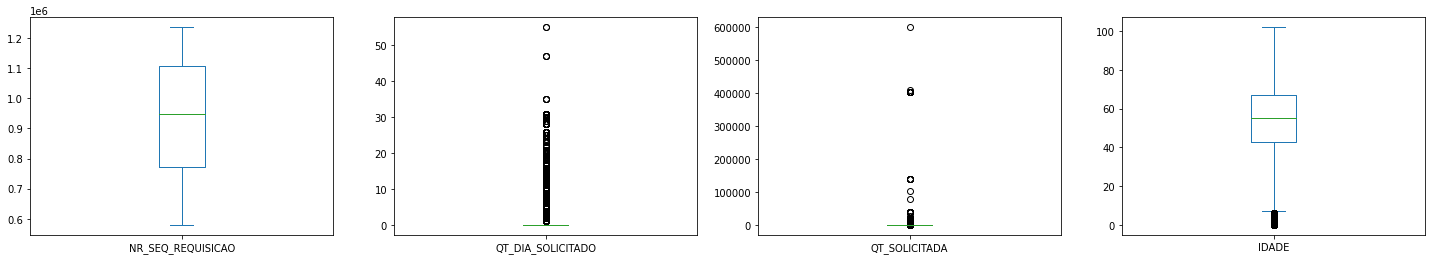

In [13]:
numeric.plot.box(subplots=True, figsize=(25,4));

In [14]:
train_dataset = preproc(train_dataset)
numeric = train_dataset[['NR_SEQ_REQUISICAO', 'QT_DIA_SOLICITADO', 'QT_SOLICITADA', 'IDADE'
                        ]]
categoric = train_dataset[[
                            'DS_TIPO_GUIA',
                            'DS_TIPO_PREST_SOLICITANTE',
                            'DS_CBO',
                            'DS_INDICACAO_ACIDENTE', 
                            'DS_TIPO_INTERNACAO',
                            'DS_CARATER_ATENDIMENTO', 
                            'DS_CLASSE', 'DS_GRUPO', 
                            'DS_SUBGRUPO'
                          ]]

target = train_dataset['DS_STATUS_ITEM']

train_dataset = pd.concat([numeric, categoric], axis=1)
print(len(train_dataset))
#train_dataset = train_dataset.dropna()
print(len(train_dataset))
y = target

227122
227122


In [15]:
target

0         Autorizado
1         Autorizado
2         Autorizado
3         Autorizado
4             Negado
             ...    
227117    Autorizado
227118        Negado
227119    Autorizado
227120    Autorizado
227121    Autorizado
Name: DS_STATUS_ITEM, Length: 227122, dtype: object

In [16]:
train_dataset.isna().sum()

NR_SEQ_REQUISICAO            0
QT_DIA_SOLICITADO            0
QT_SOLICITADA                0
IDADE                        0
DS_TIPO_GUIA                 0
DS_TIPO_PREST_SOLICITANTE    0
DS_CBO                       0
DS_INDICACAO_ACIDENTE        0
DS_TIPO_INTERNACAO           0
DS_CARATER_ATENDIMENTO       0
DS_CLASSE                    0
DS_GRUPO                     0
DS_SUBGRUPO                  0
dtype: int64

In [17]:
#train
ss, train_ss = standardScalerFunc(train_dataset[['NR_SEQ_REQUISICAO', 'QT_DIA_SOLICITADO', 'QT_SOLICITADA', 'IDADE'
                                                ]])
ohe, train_ohe = oneHotEncoderFunc(train_dataset[[ 
                                                'DS_TIPO_GUIA',
                                                'DS_TIPO_PREST_SOLICITANTE',
                                                'DS_CBO',
                                                'DS_INDICACAO_ACIDENTE', 
                                                'DS_TIPO_INTERNACAO',
                                                'DS_CARATER_ATENDIMENTO', 
                                                'DS_CLASSE', 'DS_GRUPO', 
                                                'DS_SUBGRUPO'
                                                 ]])



train_dataset = pd.concat([train_ss, train_ohe], axis=1)

In [18]:
len(train_dataset)

227122

In [19]:
label_encoder_y, y = labelEncoderFunc(y)
#target

In [20]:
len(y)

227122

In [21]:
new_columns = [i for i in range(len(train_dataset.columns))]
len(new_columns)

633

In [22]:
len(train_dataset.columns)

633

In [23]:
train_dataset.columns = new_columns

In [24]:
train_dataset

,0,1,2,3,4,5,6,7,8,9,...,623,624,625,626,627,628,629,630,631,632
0,0.954938,-0.299608,-0.015133,0.087066,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.632278,0.991561,-0.015133,-0.603700,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.032916,-0.299608,-0.015133,0.033930,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.790925,-0.299608,-0.015133,0.087066,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.013982,-0.299608,-0.014879,0.618425,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227117,0.695150,0.561171,-0.014624,0.193338,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227118,-0.063606,-0.299608,-0.014879,0.299609,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227119,-1.664739,-0.299608,-0.015133,-0.072342,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
227120,-1.249073,-0.299608,-0.014879,-0.178613,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
y = y.values.ravel()

In [26]:
len(y)

227122

# Análise exploratória dos dados

# Pré processamento e divisão de datasets

In [27]:
#from imblearn.under_sampling import NearMiss

#undersample = NearMiss(version=1, n_neighbors=3)

#train_dataset, y = undersample.fit_resample(train_dataset, y)

# Cross validation 

In [28]:
from sklearn.model_selection import cross_val_score, KFold

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import lightgbm as lgb

In [30]:
import optuna

In [31]:
OBJECTIVE = ['Accuracy']
DIMENSIONS = 9 #num_leaves, min_child_samples, n_estimators, learning_rate, subsample_for_bin, min_split_gain, min_child_weight, subsample, reg_alpha, reg_lambda
ITERATIONS = 1000
POPULATION = 15
num_leaves_min = 20
num_leaves_max = 3000
min_child_samples_min = 10
min_child_samples_max = 100
n_estimators_min = 50
n_estimators_max = 2000

learning_rate_min = 0.01
learning_rate_max = 0.3
subsample_for_bin_min = 50000
subsample_for_bin_max = 500000
min_split_gain_min = 0.01
min_split_gain_max = 0.5
min_child_weight_min = 0.0001
min_child_weight_max = 0.15
subsample_min = 1.0
subsample_max = 2.0
reg_alpha_min =0.01
reg_alpha_max = 100.0 
reg_lambda_min = 0.01
reg_lambda_max = 100.0

BOUNDS = []
SEED = 1
INDIVIDUALS = []

In [32]:
import optuna
import sklearn
from sklearn import datasets
from sklearn import model_selection
def objective(trial):
  
      #num_leaves = trial.suggest_int('num_leaves', num_leaves_min, num_leaves_max) #int
      #min_child_samples = trial.suggest_int('min_child_samples', min_child_samples_min, min_child_samples_max) #int
      #n_estimators      = trial.suggest_categorical('n_estimators', [10000])
      #learning_rate     = trial.suggest_float('learning_rate', learning_rate_min, learning_rate_max)
      #subsample_for_bin = trial.suggest_int('subsample_for_bin', subsample_for_bin_min, subsample_for_bin_max) #int
      #min_split_gain    = trial.suggest_float('min_split_gain', min_split_gain_min, min_split_gain_max)
      #min_child_weight  = trial.suggest_float('min_child_weight', min_child_weight_min, min_child_weight_max)
      #reg_alpha         = trial.suggest_float('reg_alpha', reg_alpha_min, reg_alpha_max)
      #reg_lambda        = trial.suggest_float('reg_lambda', reg_lambda_min, reg_lambda_max)
      #max_depth        = trial.suggest_int('max_depth', 3, 12)
      param_grid = {
      "n_estimators": trial.suggest_categorical("n_estimators", [7000]),
      "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
      "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20), #3000
      "max_depth": trial.suggest_int("max_depth", 3, 12), 
      "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 7000, step=100),
      "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
      "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
      "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
      "bagging_fraction": trial.suggest_float(
      "bagging_fraction", 0.2, 0.95, step=0.1
      ),
      "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
      "feature_fraction": trial.suggest_float(
      "feature_fraction", 0.2, 0.95, step=0.1
      ),}
      final_model = lgb.LGBMClassifier(**param_grid)
      
      #kfold = KFold(n_splits = 3, shuffle = True)
      kfold = model_selection.StratifiedKFold(n_splits=5)
      return sklearn.model_selection.cross_val_score(final_model,  train_dataset, y, n_jobs=-1, cv=kfold, scoring="f1").mean()

In [33]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2022-12-18 23:10:05,929] A new study created in memory with name: no-name-6fa222de-6b63-487d-8032-87ca8612bf74
/opt/conda/lib/python3.7/site-packages/optuna/distributions.py:671: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  low=low, old_high=old_high, high=high, step=step
[I 2022-12-18 23:16:43,553] Trial 0 finished with value: 0.30856833677561407 and parameters: {'n_estimators': 7000, 'learning_rate': 0.01845395919407095, 'num_leaves': 2540, 'max_depth': 11, 'min_data_in_leaf': 4300, 'lambda_l1': 45, 'lambda_l2': 70, 'min_gain_to_split': 14.779995401926922, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 0 with value: 0.30856833677561407.


In [34]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))

Accuracy: 0.30856833677561407


In [35]:
print("Best hyperparameters: {}".format(trial.params))

Best hyperparameters: {'n_estimators': 7000, 'learning_rate': 0.01845395919407095, 'num_leaves': 2540, 'max_depth': 11, 'min_data_in_leaf': 4300, 'lambda_l1': 45, 'lambda_l2': 70, 'min_gain_to_split': 14.779995401926922, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}


In [36]:
tracking = []
for i in range(len(study.trials)):
  if i == 0: 
    tracking.append(study.trials[i].value)
  elif tracking[i-1] > study.trials[i].value:
    tracking.append(tracking[i-1])
  else:
    tracking.append(study.trials[i].value)
#tracking_sorted = sorted(tracking)

In [37]:
tracking_Optuna = tracking

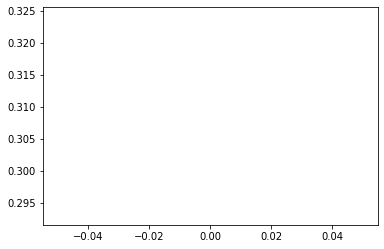

In [38]:
import matplotlib.pyplot as plt
plt.plot(tracking);
#plt.plot(tracking_sorted)

In [39]:
optuna.visualization.plot_optimization_history(study)

In [40]:
optuna.visualization.plot_slice(study)

In [41]:
'''
resultados_modelo = []
modelo = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split = 10, n_estimators = 100)
#modelo = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split = 5, splitter = 'best')
#modelo = KNeighborsClassifier()
#modelo = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
#modelo = SVC(kernel = 'rbf', C = 2.0) 


scores = cross_val_score(modelo, train_dataset, y, cv = kfold, scoring="f1")

resultados_modelo.append(scores.mean())
scores.mean()

'''

'\nresultados_modelo = []\nmodelo = RandomForestClassifier(criterion = \'entropy\', min_samples_leaf = 1, min_samples_split = 10, n_estimators = 100)\n#modelo = DecisionTreeClassifier(criterion = \'entropy\', min_samples_leaf = 1, min_samples_split = 5, splitter = \'best\')\n#modelo = KNeighborsClassifier()\n#modelo = LogisticRegression(C = 1.0, solver = \'lbfgs\', tol = 0.0001)\n#modelo = SVC(kernel = \'rbf\', C = 2.0) \n\n\nscores = cross_val_score(modelo, train_dataset, y, cv = kfold, scoring="f1")\n\nresultados_modelo.append(scores.mean())\nscores.mean()\n\n'

In [42]:
params = {'n_estimators': 10000, 'learning_rate': 0.29001290111164385, 'num_leaves': 1560, 'max_depth': 20, 'min_data_in_leaf': 4100, 'lambda_l1': 0, 'lambda_l2': 70, 'min_gain_to_split': 0.02564077641748419, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}

#params = trial.params

In [43]:
#params['num_leaves']

In [44]:
  final_model = lgb.LGBMClassifier(**params)

In [45]:
kfold = model_selection.StratifiedKFold(n_splits=5)

In [46]:
resultados_modelo = []
scores = cross_val_score(final_model, train_dataset, y, cv = kfold, scoring="f1")

resultados_modelo.append(scores.mean())
scores.mean()

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.02564077641748419, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.02564077641748419
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=4100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 wil

0.6949600374638804

In [47]:
final_model = final_model.fit(train_dataset, y)
final_model

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.02564077641748419, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.02564077641748419
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=4100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, feature_fraction=0.9,
               lambda_l1=0, lambda_l2=70, learning_rate=0.29001290111164385,
               max_depth=20, min_data_in_leaf=4100,
               min_gain_to_split=0.02564077641748419, n_estimators=10000,
               num_leaves=1560)

In [48]:
#Aqui dentro de uma função para preprocessar os dados

### Filling blanks 
validation_dataset['DT_NASCIMENTO'] = validation_dataset['DT_NASCIMENTO'].fillna(np.nanmean(validation_dataset['DT_NASCIMENTO']))
validation_dataset['DT_REQUISICAO'] = validation_dataset['DT_REQUISICAO'].fillna(np.nanmean(validation_dataset['DT_REQUISICAO']))
###Converting DT_REQUISICAO and 'DT_NASCIMENTO' to date
validation_dataset['DT_REQUISICAO'] = pd.to_datetime(validation_dataset['DT_REQUISICAO'].map(jd_to_date).map(lambda t: '-'.join([str(k) for k in t])), format='%Y-%m-%d')
validation_dataset['DT_NASCIMENTO'] = pd.to_datetime(validation_dataset['DT_NASCIMENTO'].map(jd_to_date).map(lambda t: '-'.join([str(k) for k in t])), format='%Y-%m-%d')
###Creating age variable
validation_dataset['IDADE'] = pd.DatetimeIndex(validation_dataset['DT_REQUISICAO']).year - pd.DatetimeIndex(validation_dataset['DT_NASCIMENTO']).year

In [49]:
validation_dataset_pp = preproc(validation_dataset)
test_ss = ss.transform(validation_dataset_pp[['NR_SEQ_REQUISICAO', 'QT_DIA_SOLICITADO', 'QT_SOLICITADA', 'IDADE'
                        ]])
test_ohe = ohe.transform(validation_dataset_pp[[
                            'DS_TIPO_GUIA',
                            'DS_TIPO_PREST_SOLICITANTE',
                            'DS_CBO',
                            'DS_INDICACAO_ACIDENTE', 
                            'DS_TIPO_INTERNACAO',
                            'DS_CARATER_ATENDIMENTO', 
                            'DS_CLASSE', 'DS_GRUPO', 
                            'DS_SUBGRUPO'
                          ]])

validation = pd.concat([pd.DataFrame(test_ss), pd.DataFrame(test_ohe)], axis=1)

In [50]:
validation

,0,1,2,3,0,1,2,3,4,5,...,619,620,621,622,623,624,625,626,627,628
0,3.207487,-0.299608,-0.015133,-0.019206,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.138080,-0.299608,0.208558,-0.178613,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.204604,-0.299608,-0.015133,0.193338,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.984486,-0.299608,0.137303,-0.338021,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.816356,-0.299608,-0.015133,0.512153,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186139,1.919913,-0.299608,-0.015133,0.830968,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
186140,1.920430,0.130781,-0.014879,0.565289,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186141,1.968650,-0.299608,-0.015133,-1.666417,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186142,1.877806,0.130781,-0.015133,0.777832,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
new_columns = [i for i in range(len(validation.columns))]
validation.columns = new_columns

In [52]:
validation

,0,1,2,3,4,5,6,7,8,9,...,623,624,625,626,627,628,629,630,631,632
0,3.207487,-0.299608,-0.015133,-0.019206,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.138080,-0.299608,0.208558,-0.178613,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.204604,-0.299608,-0.015133,0.193338,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.984486,-0.299608,0.137303,-0.338021,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.816356,-0.299608,-0.015133,0.512153,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186139,1.919913,-0.299608,-0.015133,0.830968,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
186140,1.920430,0.130781,-0.014879,0.565289,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186141,1.968650,-0.299608,-0.015133,-1.666417,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186142,1.877806,0.130781,-0.015133,0.777832,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
pred = final_model.predict(validation)

In [54]:
pred = label_encoder_y.inverse_transform(pred)

In [55]:
from itertools import zip_longest
submission = pd.DataFrame.from_records(zip_longest(validation_dataset['Unnamed: 0'], pred), columns=['ID', 'DS_STATUS_ITEM'])

submission.set_index('ID').to_csv('submission.csv')